# Bank customer churn prediction: Identifying the question


In this project, the overall goal is to predict the churn of bank customers. From a business perspective, this is very relevant for the effort to retain customers with the ultimate end goal of increasing profitability.

Customer churn is defined as the percentage of customers that stopped using a company's product or service offering in a defined time frame. One might consider that customer churn is not so important as long as more new customers are acquired than lost to the company. This is fogetting entirely the cost of acquiring new customers. Bringing in new customers is a lot less profitable than retaining customers. In financial services, for example, a 5% increase in customer retention produces more than a 25% increase in profit (http://www2.bain.com/Images/BB_Prescription_cutting_costs.pdf). The reason for that is because returning customers spend on average more than already existing customers. In online services, a loyal customer spends on average 2/3 more than a new one (http://www2.bain.com/Images/Value_online_customer_loyalty_you_capture.pdf). At the same time there is a cost associated with acquiring new customers, which decreases when less new customers have to be acquired. Keeping existing customers thus allows for a reallocation of funds away from the need of growing by acquiring new customers. 

Customer churn can be reduced by pooling resources into keeping the most profitable customers, instead of focusing on keeping overall customer numbers (even unprofitable ones). Another option would be to find out why and when customers are leaving, thus targeting in a customer lifetime this specific point and put effort into avoiding churn. In either case, the customer churn has to be thoroughly analyzed, which is what this small example project is designed to deliver.

In [3]:
from IPython.display import Image

## Outline

This churn prediction project follows this outline:

1. **Dataset description**
2. **Descriptive visualizations using Tableau**
3. Data extraction, transforming, and loading (ETL)
4. Analysis of the dataset
5. Visualization of the insights

In this part of the project, stages 1 and 2 are covered.

## 1. Dataset description

The dataset can be found in Section 2: How to use Tableau for Data Mining on www.superdatascience.com/training. It contains 10000 records of a banks customers with some credit information (credit card, salary, bank balances, and so on) information on age and gender and whether or not the customer have churned. 


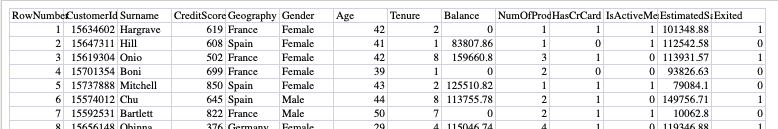

In [16]:
Image("dataset.png", width=800)

At this point, a detailed investigation of the values in each column is not performed, this comes only in step 3 of the earlier outlined process. Instead, the columns are briefly described here. This does not replace a careful quality assurance step that will be covered in the ETL stage of the project. There was no complete description given with this dataset, during the Udemy-course "Data Science A-to-Z" from Kirill Eremenko some of the columns where verbally introduced (indicated with the label `verified`), but not all of them. Hence so the following column description is a "best guess" estimation for some columns:

- `RowNumber` `verified`: A (supposedly) unique identifier for the rows.
- `CustomerId` `verified`: An (supposedly) unique ID for the customer.
- `Surname` `verified`: Last name of the customer.
- `CreditScore`: A score that the bank gives to the customer, the higher the score, the more likely the customer is to receive a credit when they apply for one.
- `Geography` `verified`: Location in which the customer is registered with the bank.
- `Gender` `verified`: Gender of the customer.
- `Age` `verified`: Age of the customer at the point when the dataset was extracted.
- `Tenure`: This could be how long the customer has been with the bank at the time the dataset was extracted. It could also be the time duration of a loan. It does make more sense to assume the former, given the data, but one cannot be certain at this point.
- `Balance` `verified`: Account balance of the customer. It is not detailed in which currency, in this project it will be considered as USD.
- `NumOfProduct` `verified`: How many product offerings of the bank the customer has.
- `HasCrCard` `verified`: 1 if the customer has a credit card, otherwise 0.
- `IsActiveMember` `verified`: 1 if the customer is an active member, otherwise 0. It is not defined what "active" refers to.
- `EstimatedSalary` `verified`: The salary of the customer estimated by the bank.
- `Exited` `verified`: 1 if the customer has left the bank, 0 otherwise. This is the label that this project aims to predict.


Note that throughout the analysis, the dataset is considered to be representative of the whole bank. Hence the conclusions drawn from the dataset are considered a representation of the bank as a whole. In reality, this should be carefully verified!

 ## 2. Descriptive visualizations using Tableau
 
 
The software package Tableau was used to create some visualizations. A series of a visualized A/B tests will be performed. What this means is that no statistical significance will be assess at this point. This step is nontheless important and aims to gain familiarity with the dataset as well as identifying possible routes to investigate further into. In a real case scenario, this would include lots of management with stakeholders and could possibly open up alternative areas to investigate later on, outside the scope of the current project.

This visualization was detailed in the Udemy-course "Data Science A-to-Z" from Kirill Eremenko. 

### Geography

The bank has customers from three countries: France, Germany, and Spain. As can be seen in the graphic, around half of the banks 10000 customers are registered in France. The rest of the customers are shared between Spain and Germany in equal proportion (25%).




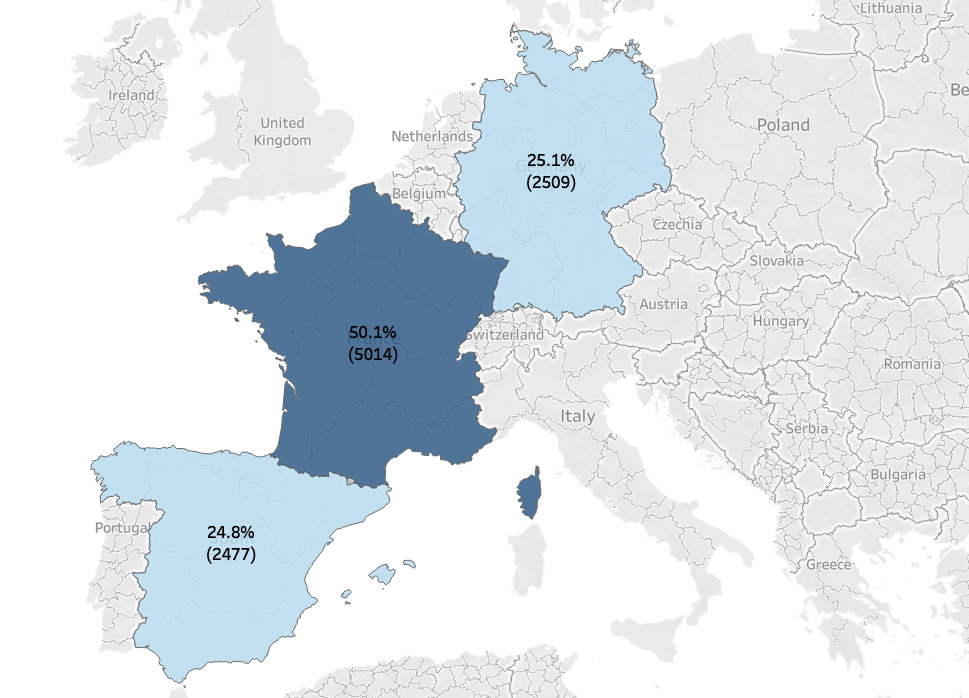

In [17]:
Image("geography_map.png", width=800)

Does the country in which the customer is registered have an impact on the churn? The graphic below shows the percentage of the total number of customers in that country that stayed with the bank and that percentage of customers that left the bank in each country. The shaded line at 20% represents the overall percentage of customers that left the bank, which is 20%, regardless of any feature. One can see that there seems to be a correlation between the country and the churn of a customer. At this point the idea is not to verify if this is a statistically significant finding, that will be done at a later stage. 




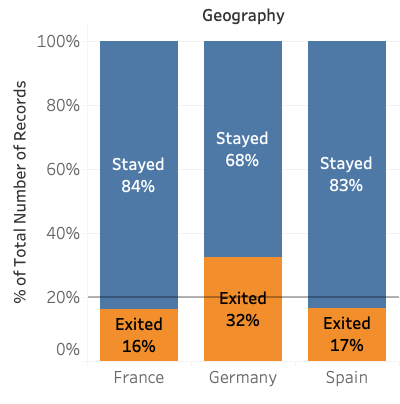

In [20]:
Image("geography_exited.png", width=300)

### Gender


In the dataset the distribution of the two gender labels is about equal, around 45% of the customers are female and the remaining 55% are male. That is summarized in the graphic below, that also contains the actual number of customers from each gender that left the bank. From the relative numbers, one can infer that a female customer is more likely to leave the bank thank a male customer, since 25% of females have left the bank and only 16% of males compared to the 20% baseline. Similar to the geography feature, this difference should be tested for statistical significance later.


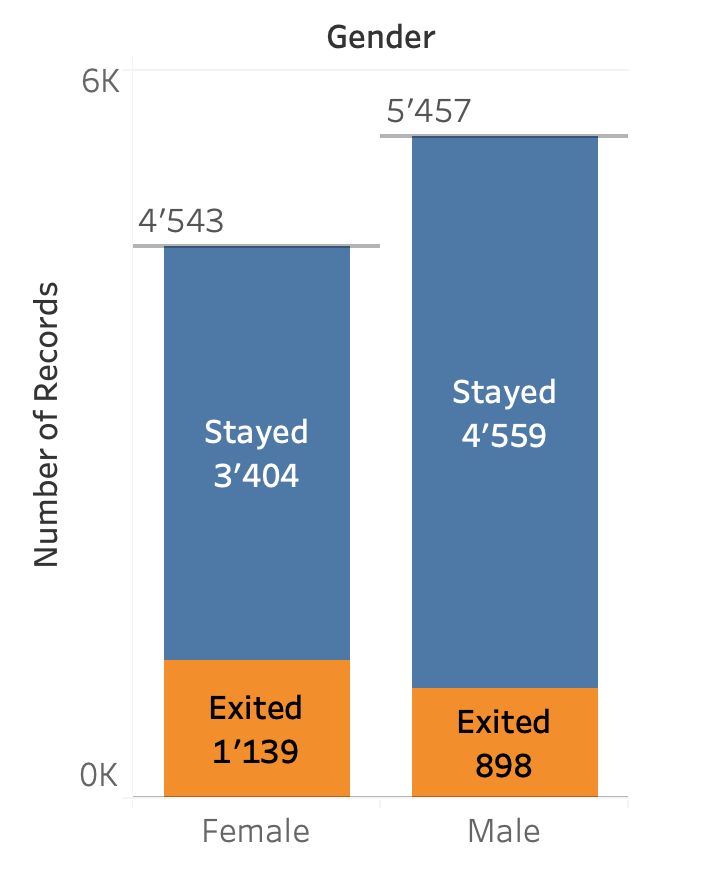

In [22]:
Image("gender_exited_actual.png", width=300)

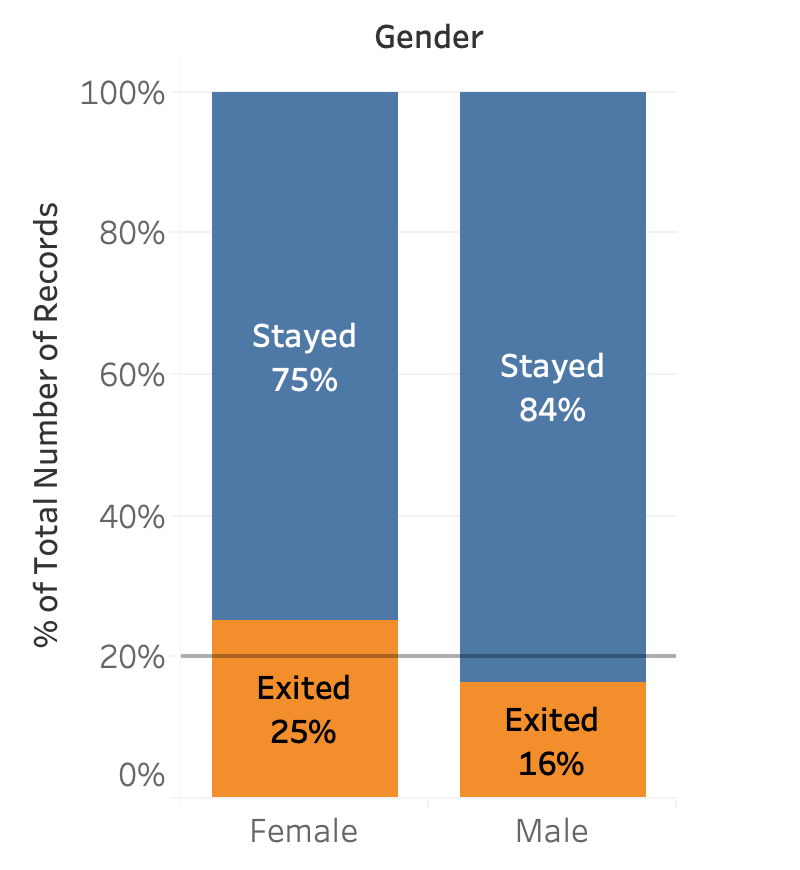

In [23]:
Image("gender_exited.png", width=300)

### HasCrCard


More than double the number of customers have a credit card with the bank - 7000 in total - compared to the 3000 that do have a credit card with the bank. 
There appears to be no difference in the number of customers that have a credit card and left the bank and those that did leave the bank without having a credit card. Almost 20% of customers, the same as the overall churn ratio, left the bank regardless if they had a credit card or not. One does not need to explore this carefully later, the total number of customers in either of the two groups is high. That is the power of this visual exploration, one can immediately draw a conclusion and save lots amount of time not having by preselecting features that do not need to be investigated closer further down the line.


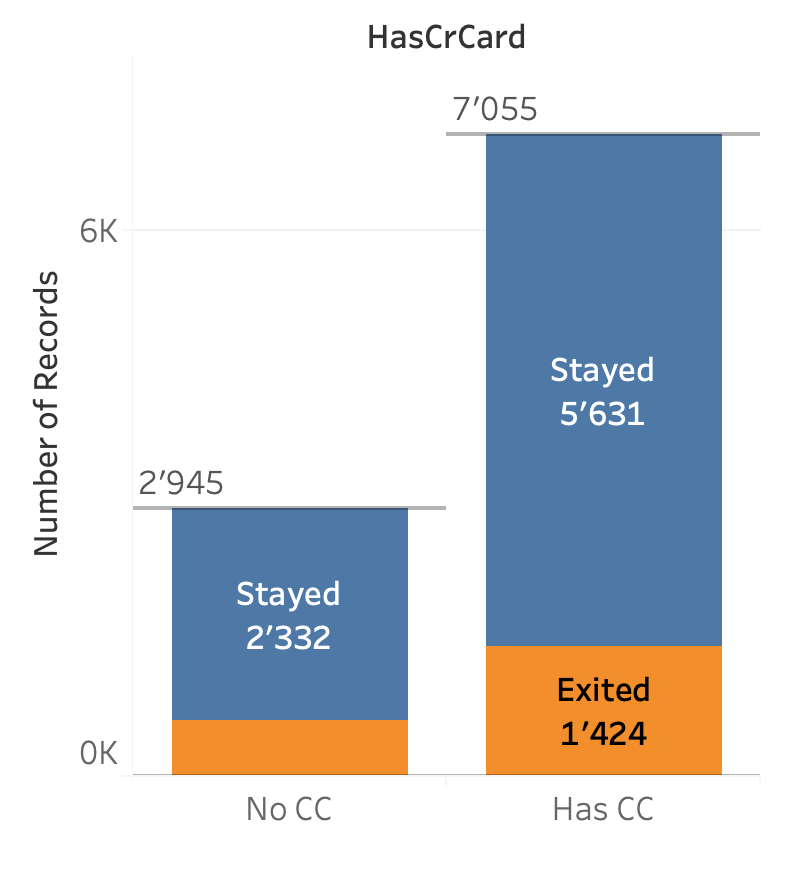

In [24]:
Image("hasCcCard_exited_actual.png", width=300)

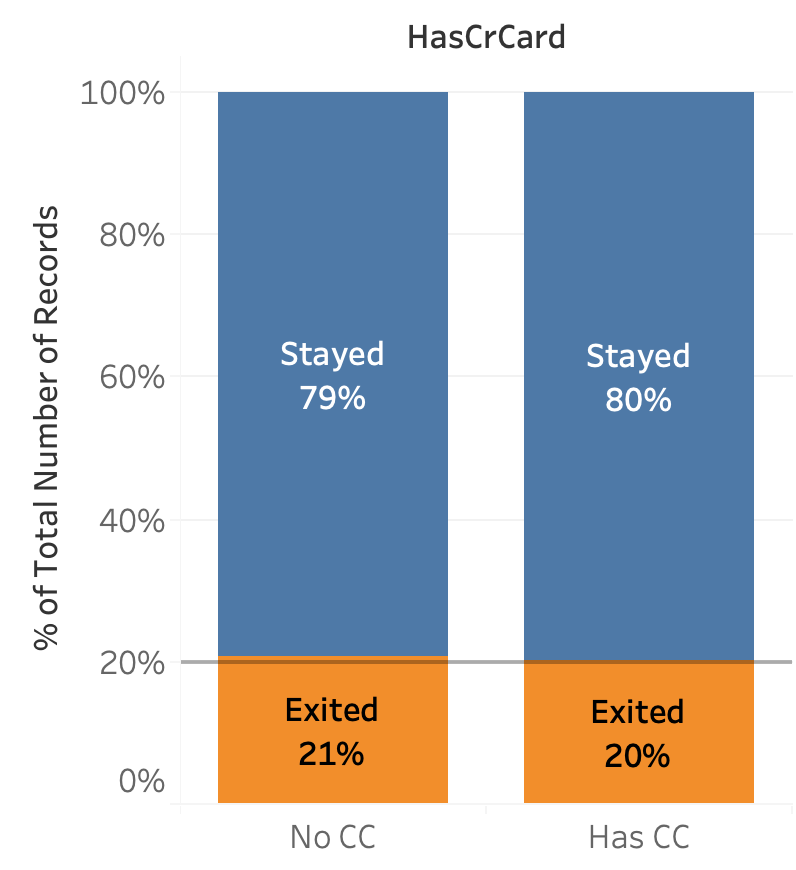

In [25]:
Image("hasCcCard_exited.png", width=300)

### IsActiveMember


Overall in the dataset about half the members are active and the other half is inactive. However, only 14% of the active members left the bank, whereas 27% of the inactive members have left the bank. 


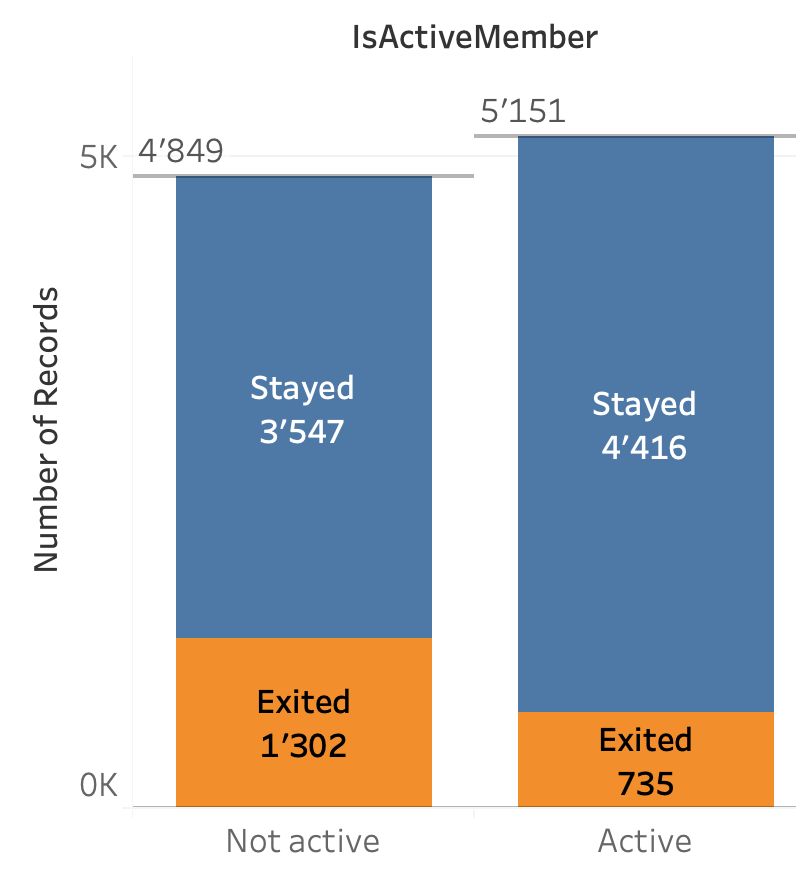

In [26]:
Image("isActiveMember_exited_actual.png", width=300)

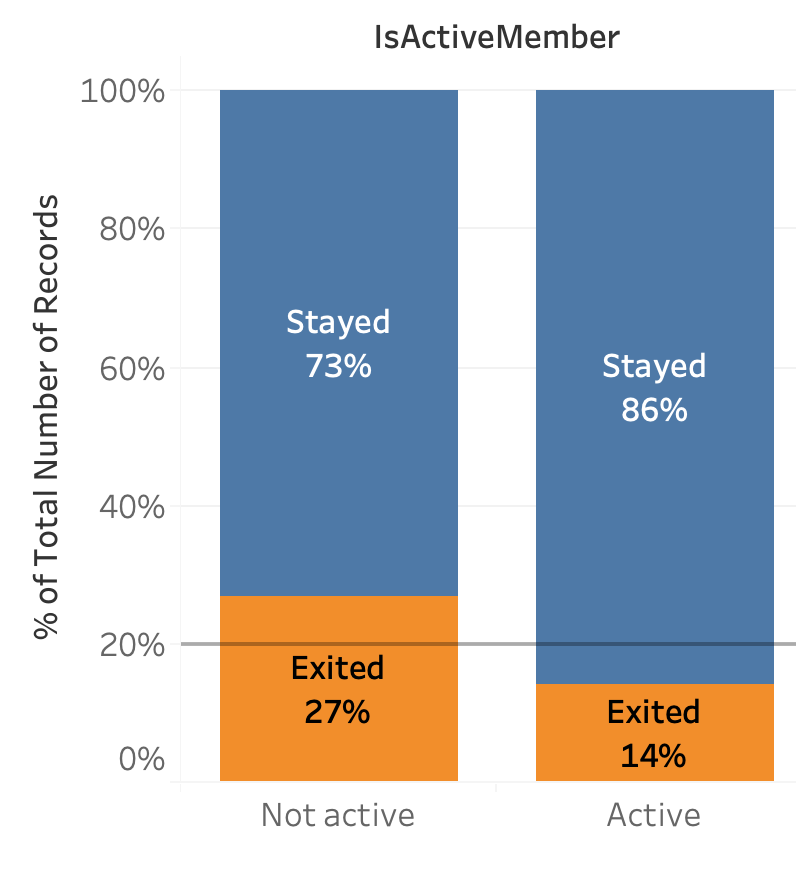

In [27]:
Image("isActiveMember_exited.png", width=300)

### NumOfProducts


The customers of the bank have between one and four product offerings. In the visualization below, the total number of customers and the relative numbers colored by the flag if the customer stayed or left are outlined. First, the number of records for customers with one or two products is high compared to those customers that have three or four products. This is important to keep in mind in the further analysis. It is not correct to conclude at this point that having many products is highly indicative that the customer leaves the bank. One also should verify this finding in the dataset with the stakeholders at the bank. Is this dataset truly representative of the overall bank customers, is this sample representative of the whole population? 

Looking at the difference in customer churn for customers with one or two products, however, shows a striking difference. Only 8% of customers with two products, but 28% of customers with only one product left the bank.


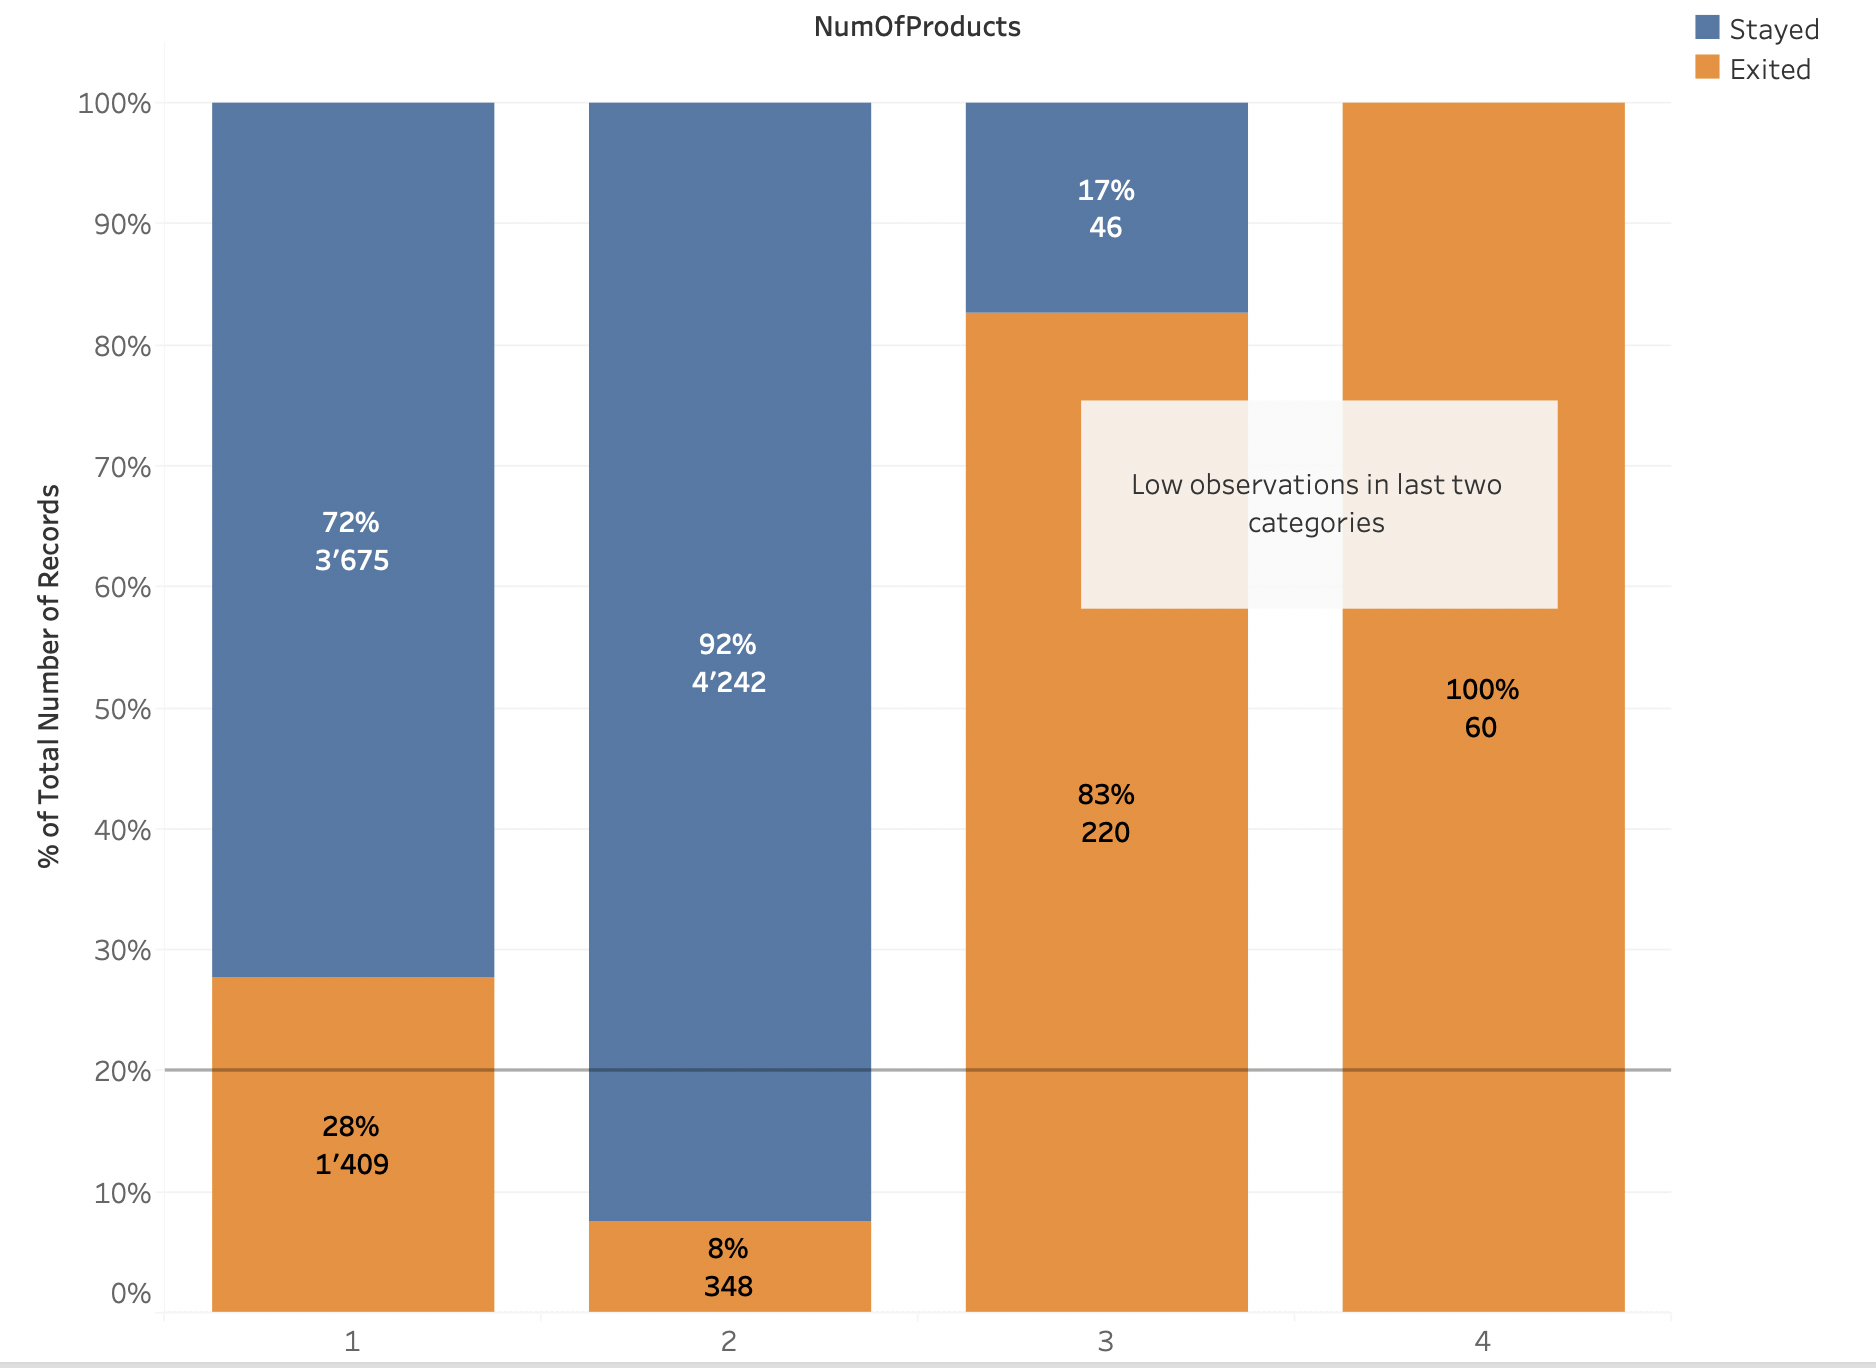

In [28]:
Image("numOfProducts.png", width=800)

### Age



When focusing on the age of the customer, it is important to investigate first the distribution of ages present in the dataset. For this, the binning feature in tableau comes in handy. In the graphic below the bins on the x axis represent ages 0 through 19, 20 through 24, 25 through 29, and so on. For a final visualization, the binning should be addressed, but in this preliminary investigation, the focus is not on a publication ready graph.

One can see that the majority of the customer seem to be in their 30s and the distribution of ages is skewed to the right. Since the age was given as an integer number in the dataset, this representation in the bins make sense because one does not know the decimal point (month) of the age of the customer.
Interestingly enough, from this visual exploration it seems that the customer churn is low until customers aged in their 40s with peaks in the 50s and 60s. Again also at this point, if this is statistically significant has to be verified.


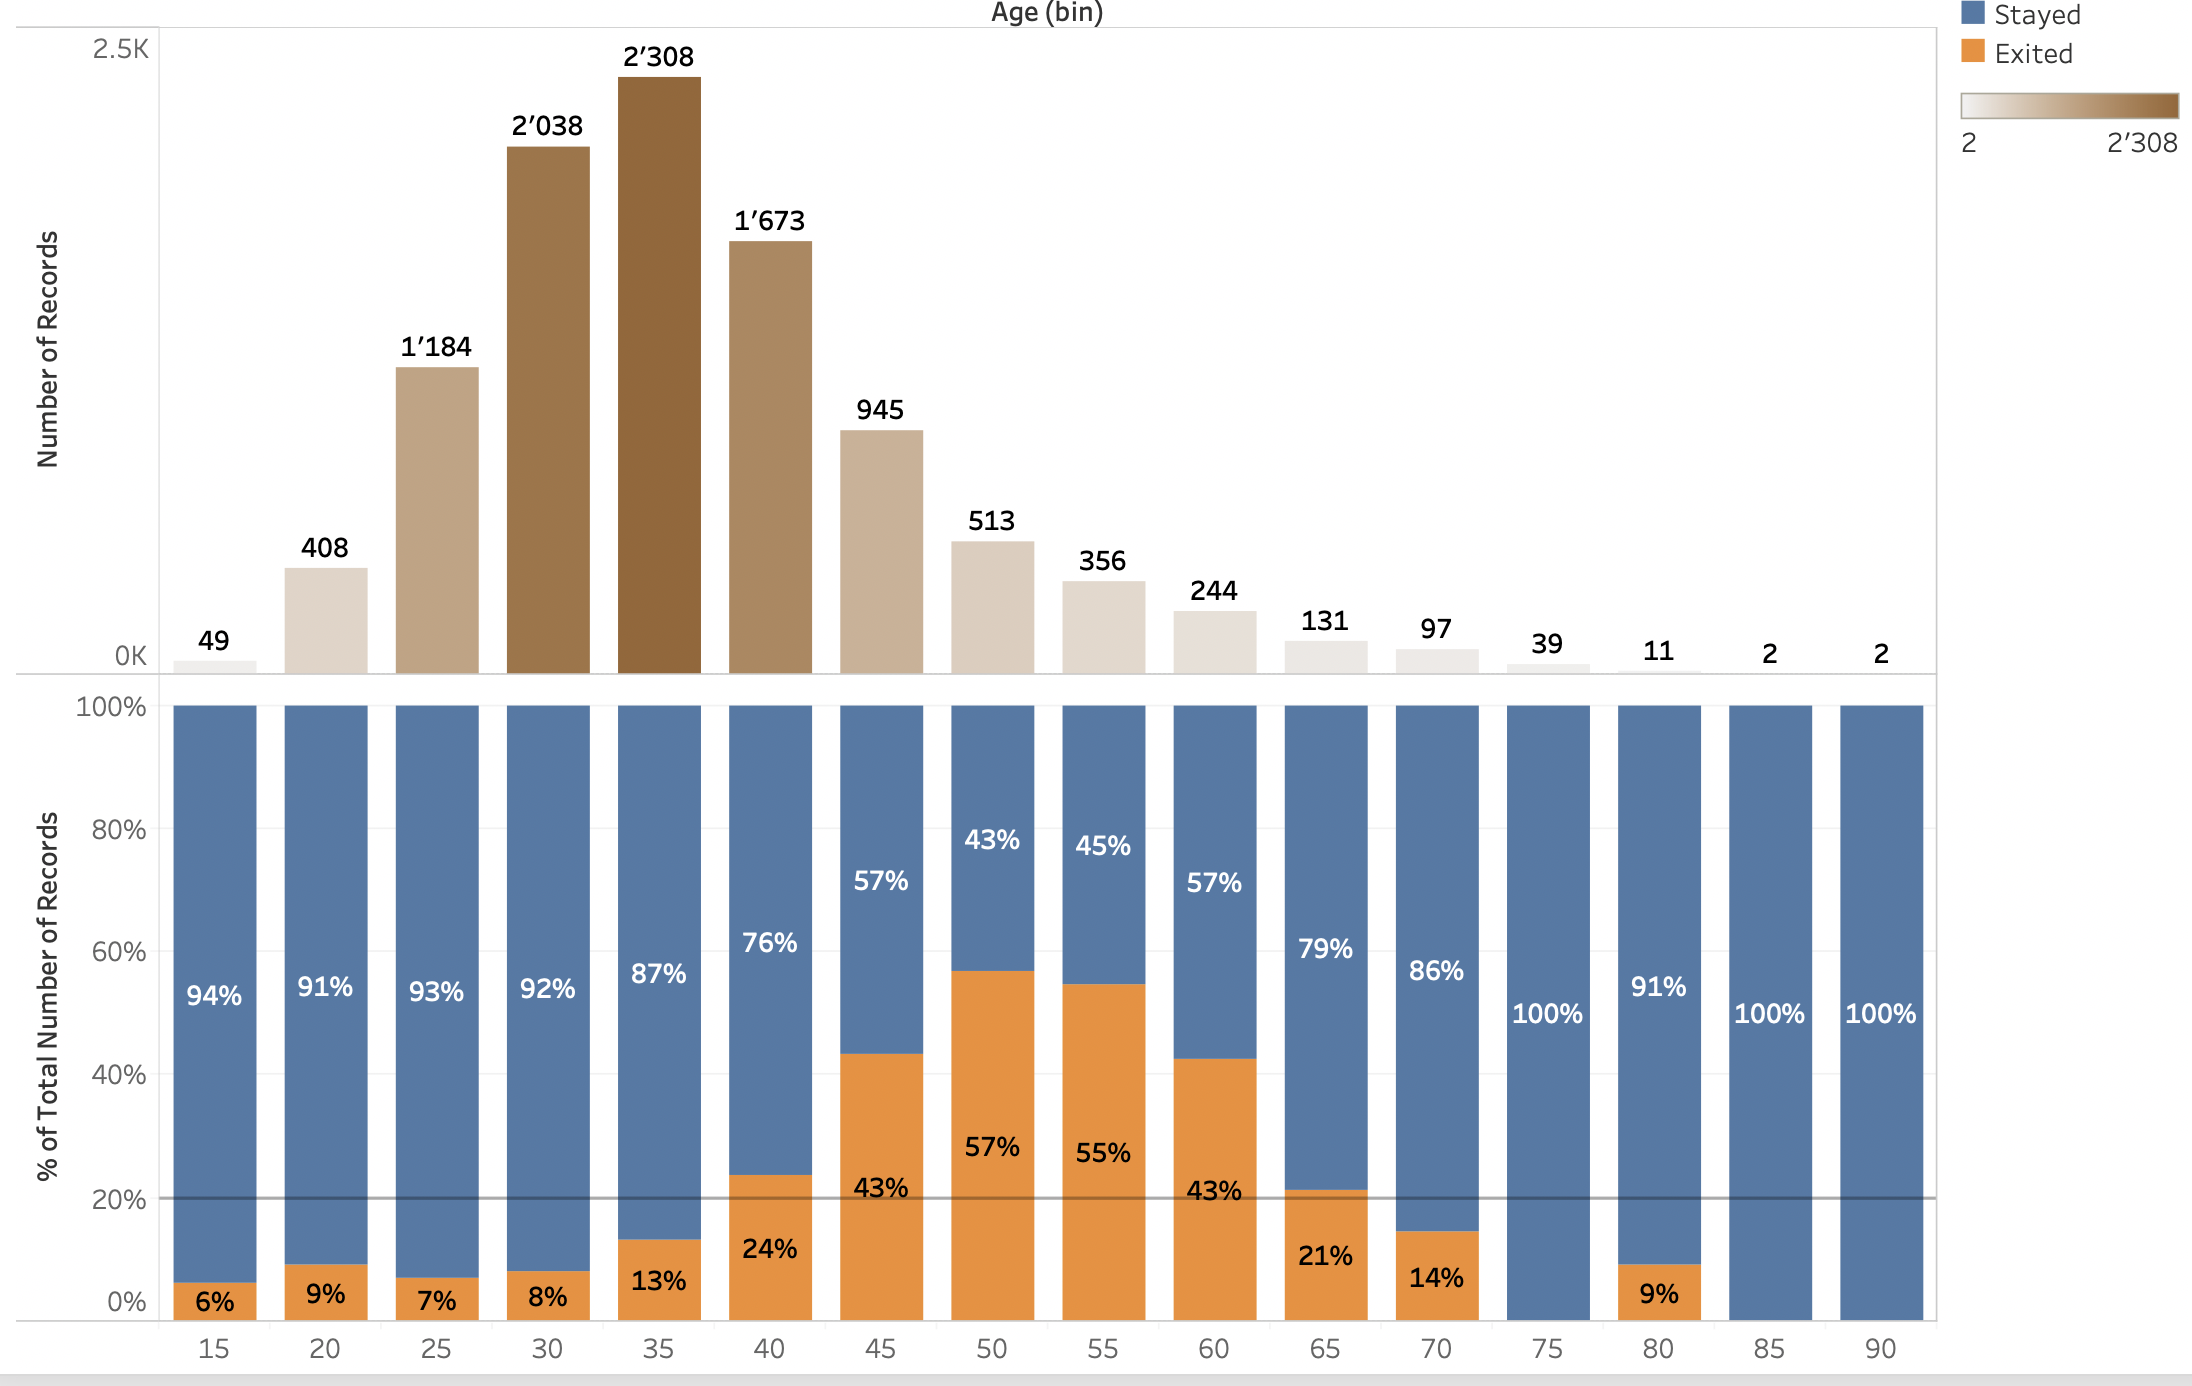

In [29]:
Image("age.png", width=800)

### Balance


The binning in the distribution of balances of the customers is the same type as in the age distribution, i.e. 10K refers to 0K through 19K and so on. The balance distribution is not skewed. Most of the customers have balances around 80000 to 160000 USD (or any other currency, the dataset does not detail this information). There is no evident trend, especially when compared with the age distribution earlier, in the balance of a customer and the indication of that customer leaving the bank. If any, it would be that 29% of customers with around 110000 to 119000 USD balance in their account left the bank compared to the 19% of customers that left with 80000 to 89000 USD.



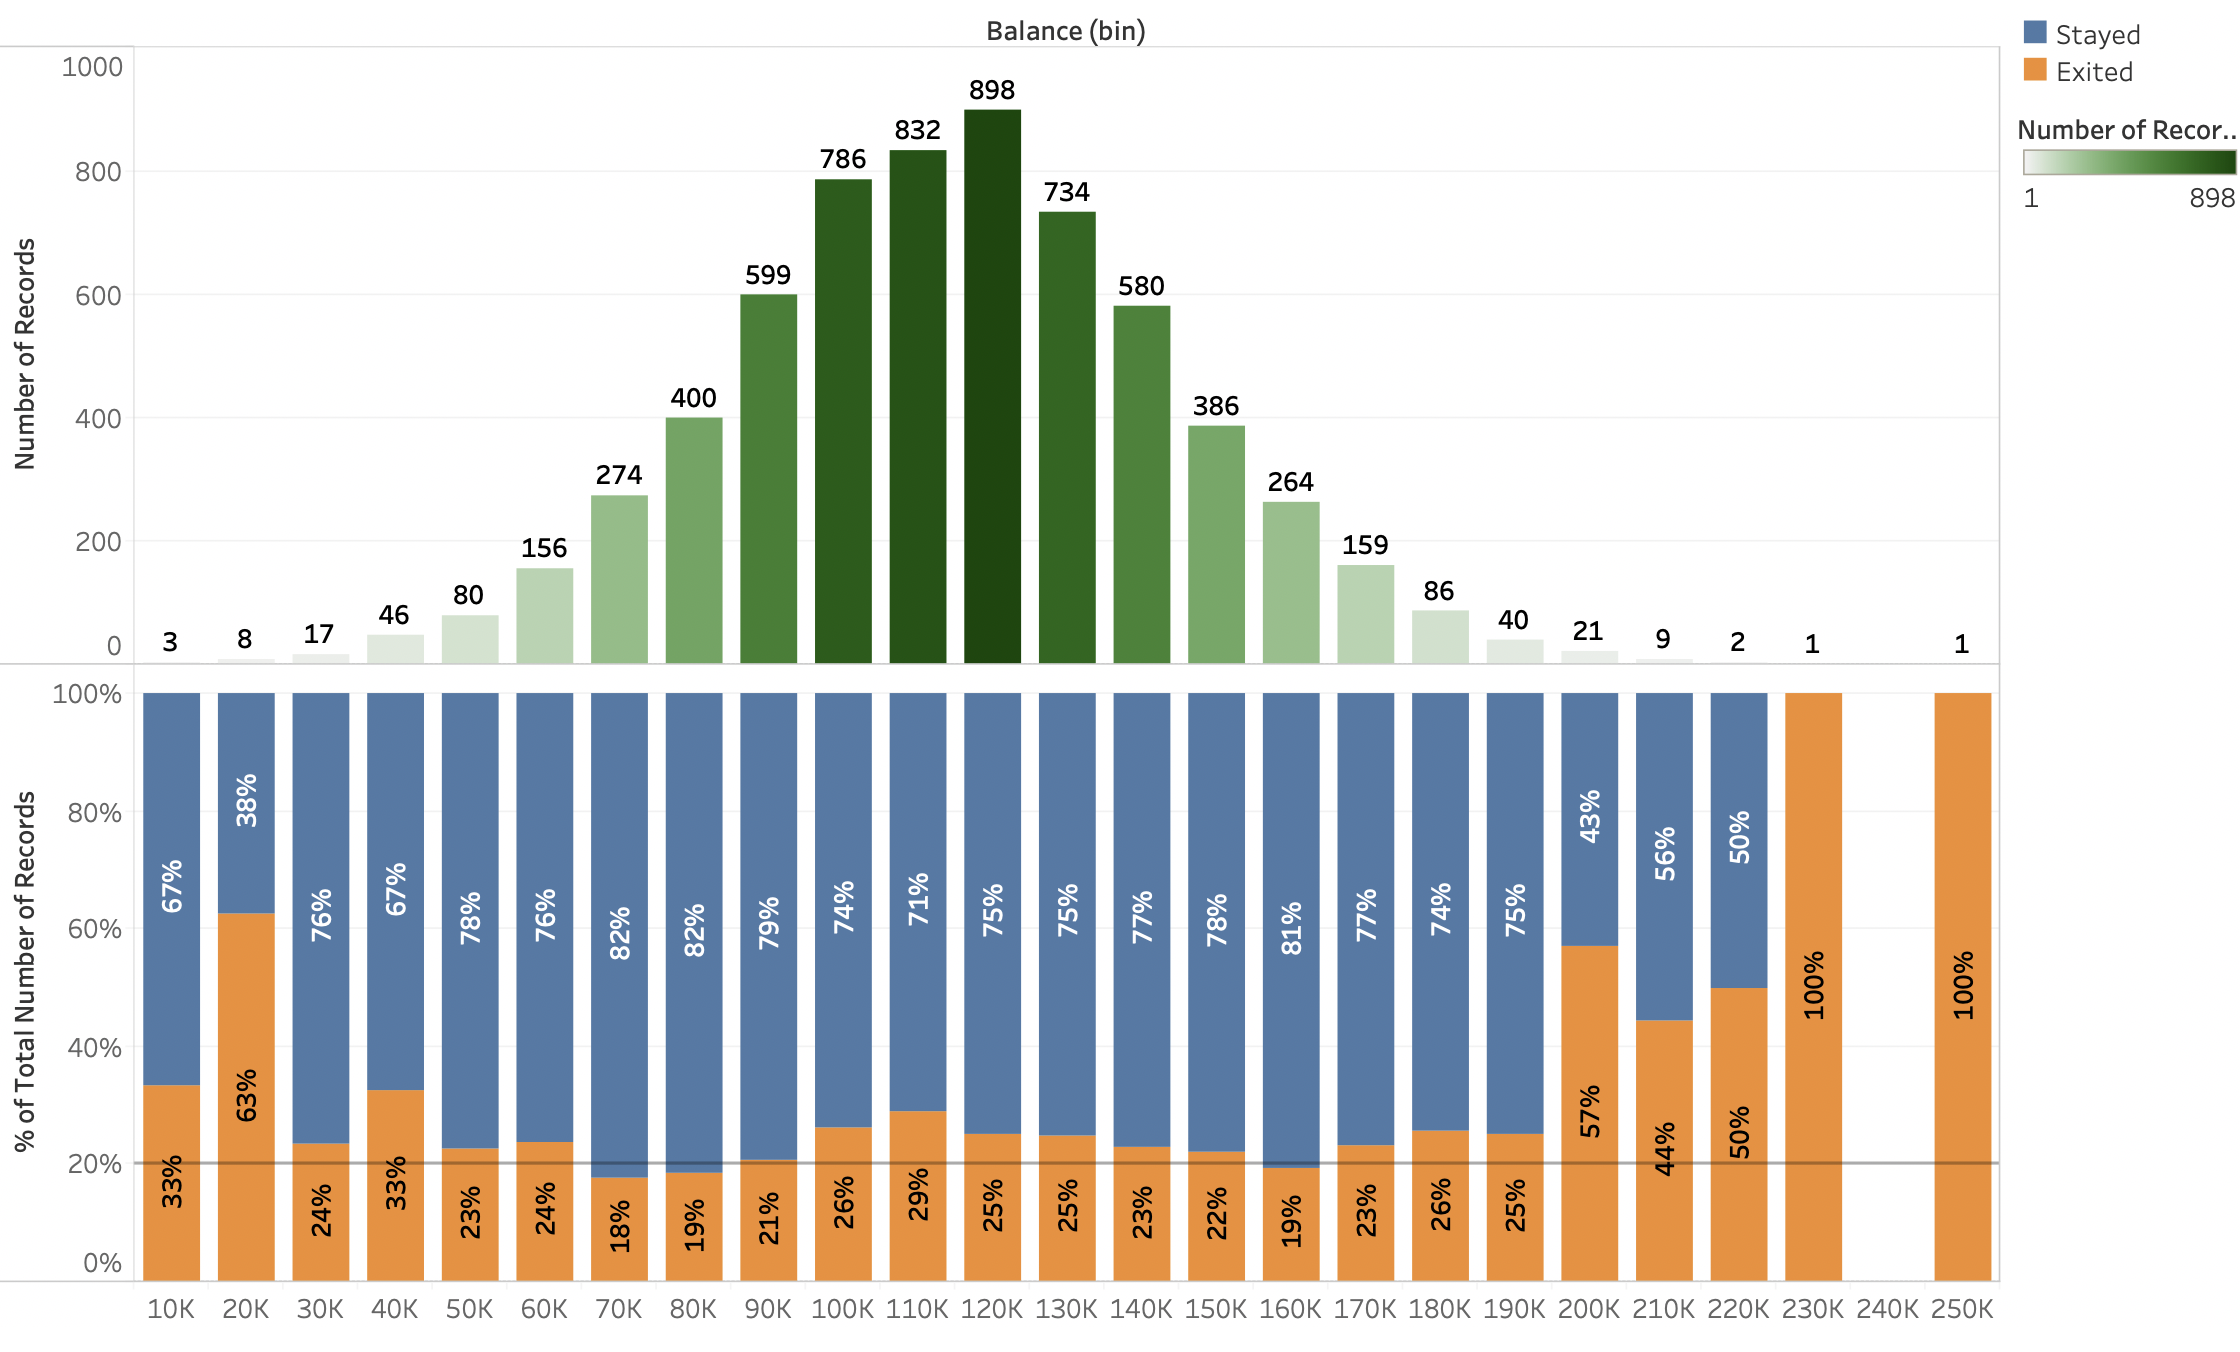

In [30]:
Image("balance.png", width=800)

### CreditScore



Since the variable credit score is not further elaborated on, its analysis is difficult. In a real scenario, this would be investigated closely further. For example, is this metric computed by this bank, shared between other banks, or is there a third party (public) that does this as a service. From the pure numbers, most of the customers of the bank have credit scores between 500 and 775, where the distribution is skewed to the left. A significant relationship between churn and credit score cannot be identified in this visual way. 


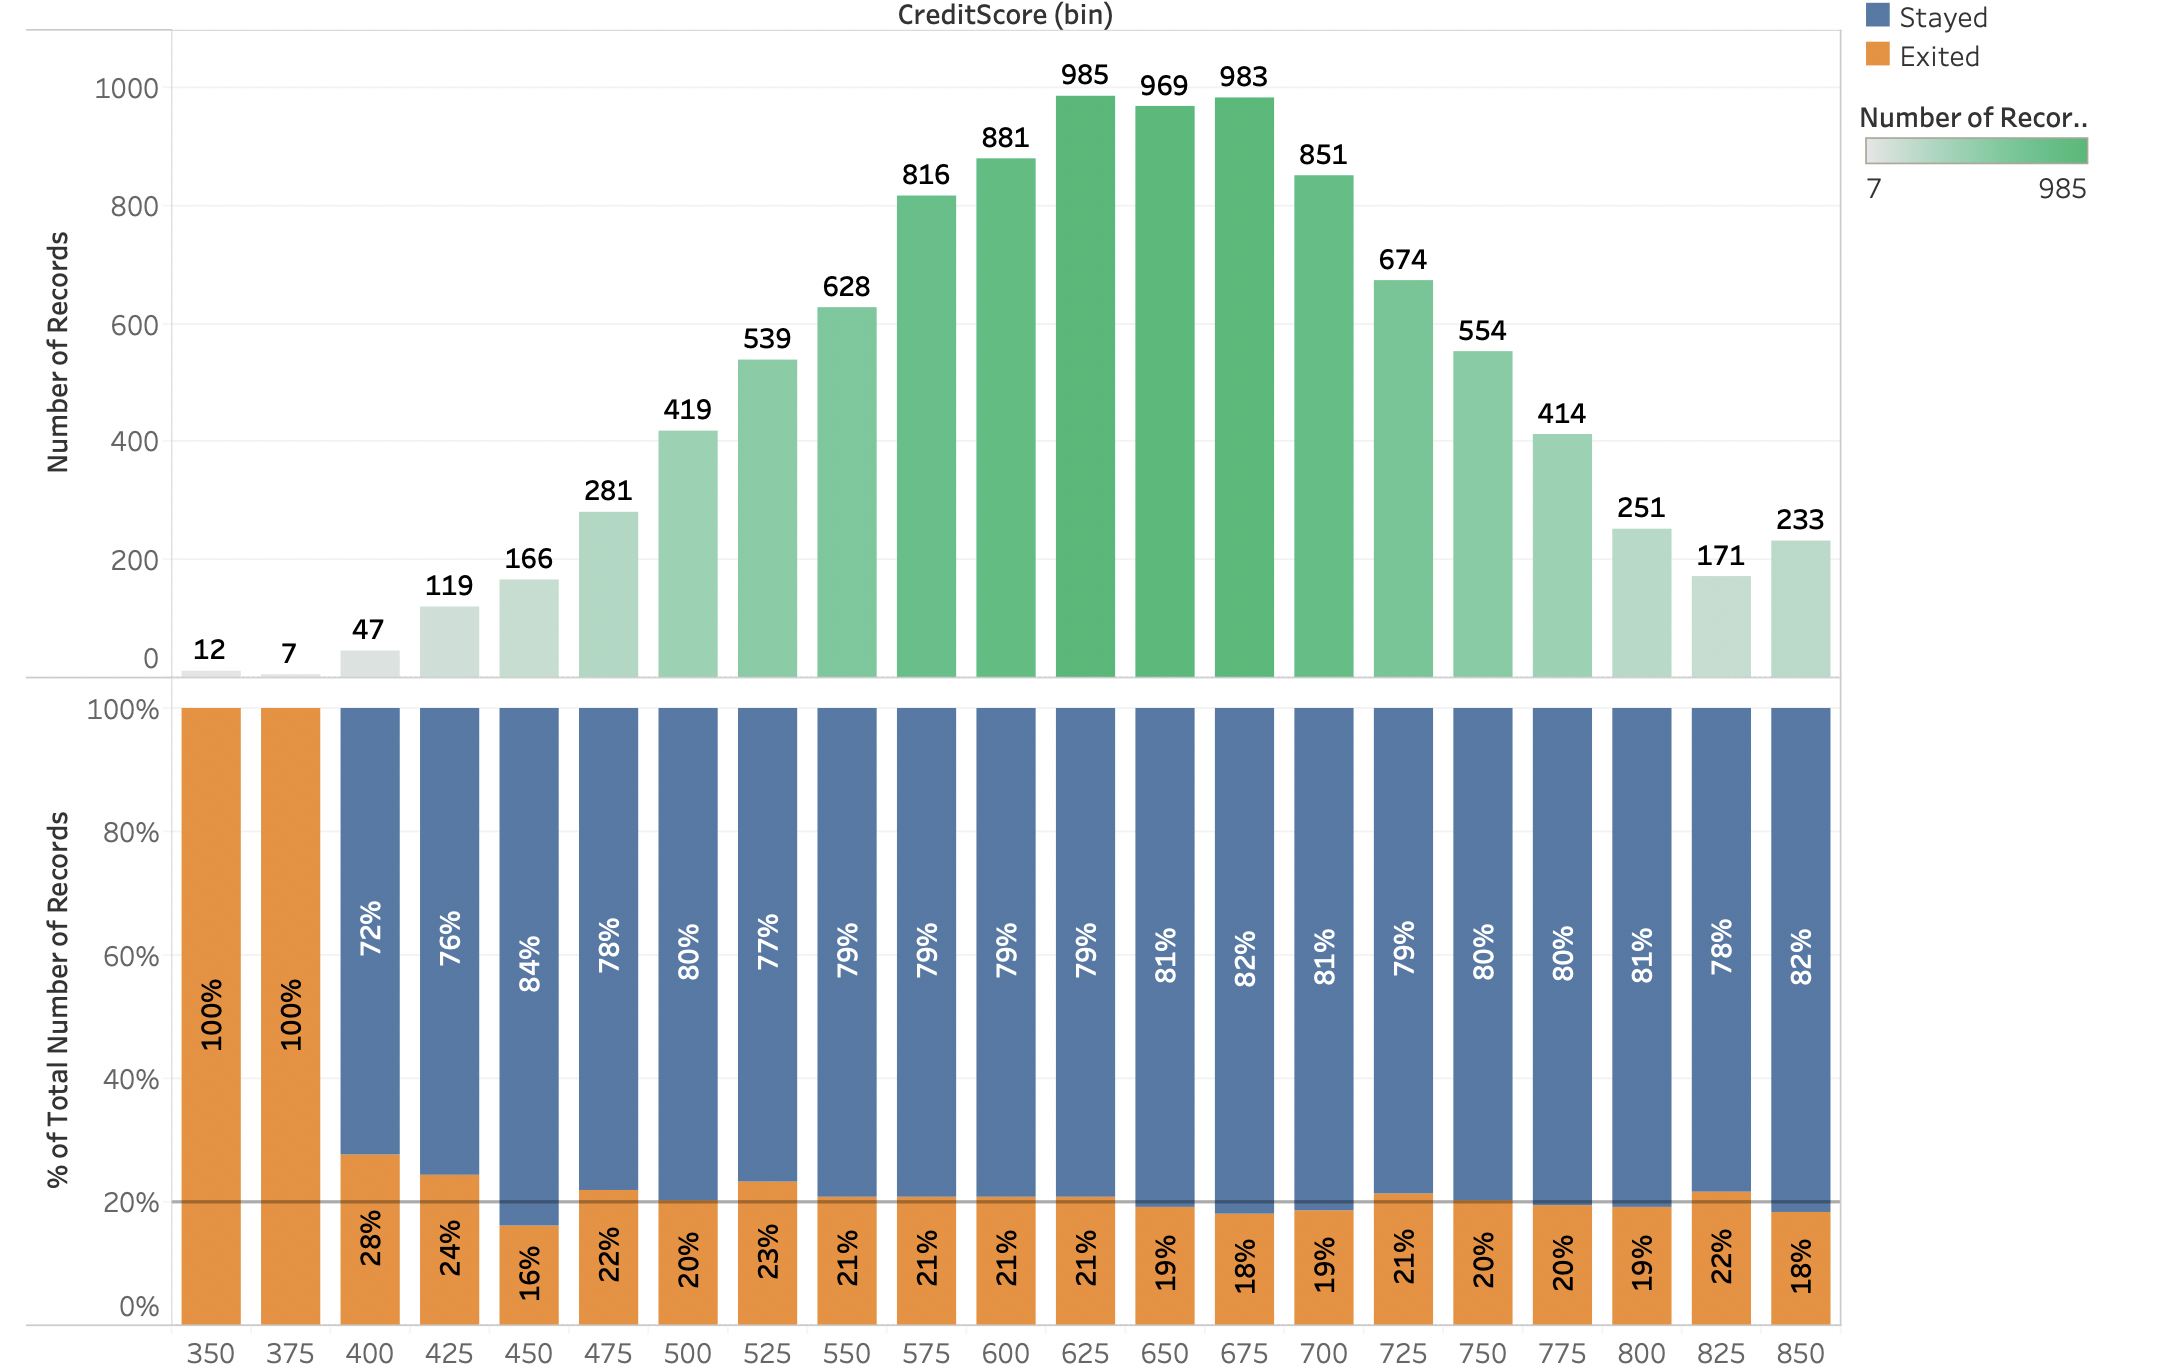

In [31]:
Image("creditScore.png", width=800)

### EstimatedSalary


This feature is interesting, because the bank came up with this number. It is unclear how they arrived at one salary for any customer, but from the distribution below, the salary was estimated uniformly among their clients. There is a strong sign that something in the estimation might not be correct, or this number was somehow aggregated over the whole base of their customers. It is especially striking when comparing the balance distribution with the estimated salary distribution. If one assumes the estimation of the salary was correct, there is no impact from the salary on the churn of a customer.


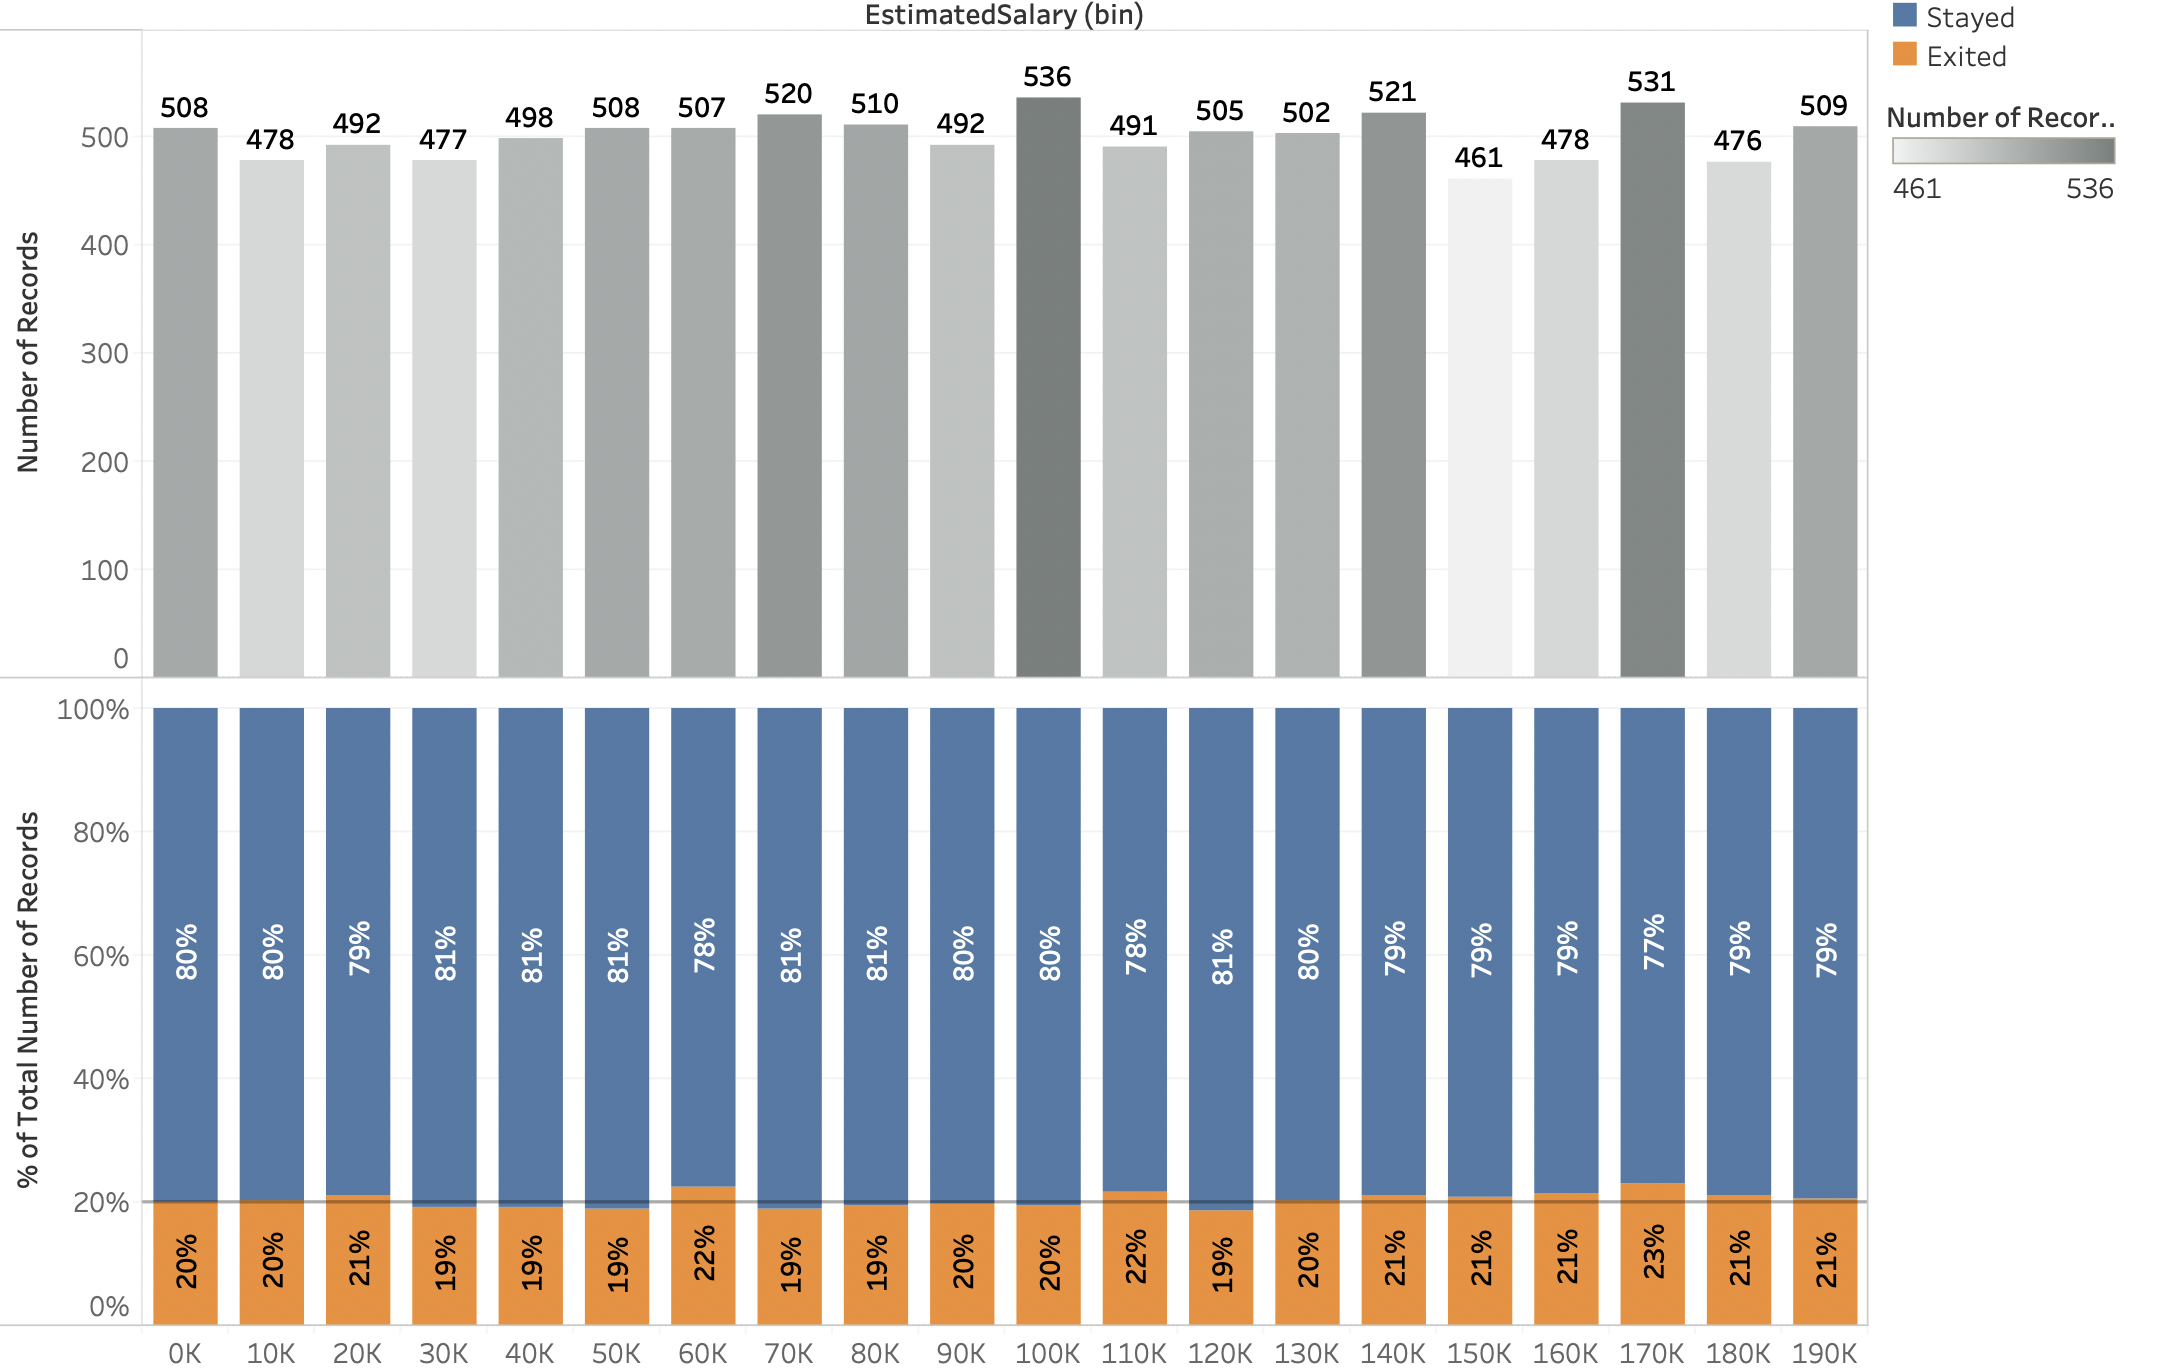

In [32]:
Image("estimatedSalary.png", width=800)

# Summary


In this part of the project to predict bank customer churn the question one would ask the dataset was introduced, the dataset was explained, and some visual A/B tests were carried out to get a feeling for the different features in the dataset. These are the main findings:

1. The 100000 customers are registered in three European countires: France (50%), Germany (25%), and Spain (25%). The geography could be a significant indicator for customer churn.
2. There are about equal proportions (50-50) of male and females with the bank. Gender could be an indicator for customer churn.
3. About 70% of customers have a credit card, but the posession of a card does not impact churn.
4. Half of the customers are active and those that are not active seem to leave the bank at a higher rate than the active members.
5. A customer can have between one and four products of the bank. Customers with only one product exited the bank more than those with more, but the records for customers with three or four products is scarce in the dataset.
6. Most of the customers of the bank are in their 30s, yet churn is highest for customers between the age 45 and 65.
7. Customers have around 80000 to 160000 USD balance in their account and churn is not impacted by that number.
8. Most of the credit scores of the customers range from 500 to 775 and like the balance, have no clear impact on the churn of the customers.
9. The salary estimated by the bank is likely miscomputed. Its distribution over the customers is uniform and there is no impact whatsoever on the churn.